# 1. Generating spike trains
Using models from what we worked on in class, I refactored into a compneuro library.

In [154]:
# load spiking models and analysis techniques
from compneuro import *

In [155]:
# constants
T = 2 # seconds
NUM_SPIKETRAINS = 1000 # spike trains

# method parameters
# rate range, burst rate range, tau_ref, tau_burst, p_start_burst, p_exit_burst
method1 = [(15,20), (0,), (0,), (0,), (0,), (0,)]
method2 = [(20,22), (0,), (20,25), (0,), (0,), (0,)]
method2 = [(4,8), (80,90), (2,4), (40,60), (0.4,0.6), (0.2,0.3)]

In [156]:
# generate spike trains!
meth1 = [poisson_refractory_method1(np.random.randint(15,21), T, tau_ref=0) for i in range(NUM_SPIKETRAINS)]
meth2 = [poisson_refractory_method2(np.random.randint(20,23), T, tau_ref=np.random.randint(20,26) / 1000) for i in range(NUM_SPIKETRAINS)]
meth2_burst = [poisson_burst_method2(np.random.randint(4,9), np.random.randint(80,91), T, tau_ref=np.random.randint(2,5)/1000, tau_burst=np.random.randint(40,61)/1000, prob_burst=np.random.uniform(0.4,0.6), prob_end=np.random.uniform(0.2,0.3)) for i in range(NUM_SPIKETRAINS)]

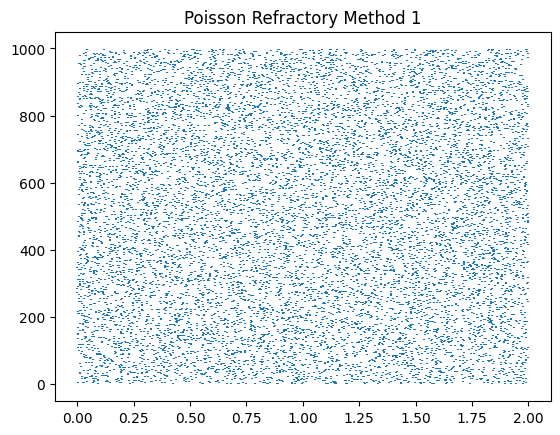

In [157]:
plt.eventplot(meth1);
plt.title("Poisson Refractory Method 1");

The figure shows uniformly random Poisson spiking trains. There is no refractory period so we don't see any gaps after spike sequences.

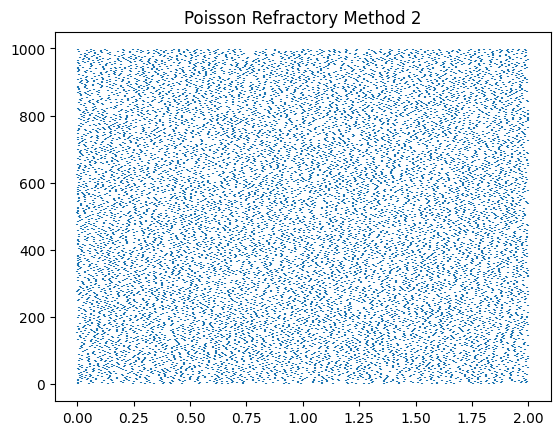

In [158]:
plt.eventplot(meth2);
plt.title("Poisson Refractory Method 2");

This method has a refractory period so we do see gaps after each sequence of spikes, making the graph appear more ordered.

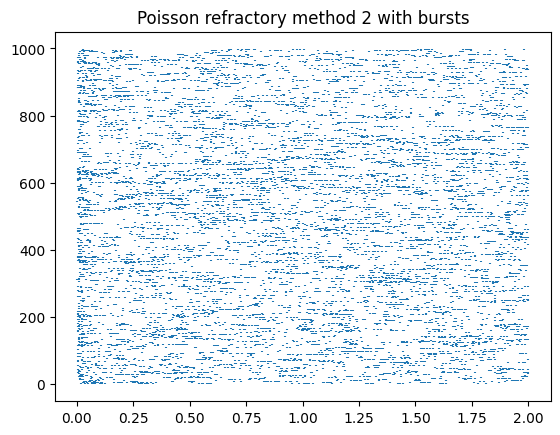

In [159]:
plt.eventplot(meth2_burst);
plt.title("Poisson refractory method 2 with bursts");

We now have a chance of enturing a burst, continuing to burst, and exiting a burst along with a high burst rate and modest regular rate. The graph contains long trains of spikes as well as long gaps of no spikes.

# 2. Determining Coefficient of Variation (CV) and Fano Factor
Examining CV and Fano Factors for each trial (row) of the spike train graphs.

In [160]:
CV_meth1 = [cv(trial) for trial in meth1]
CV_meth2 = [cv(trial) for trial in meth2]
CV_meth2_bursts = [cv(trial) for trial in meth2_burst]

In [161]:
# use seaborn
import seaborn as sns
bins = np.linspace(0,3,100)

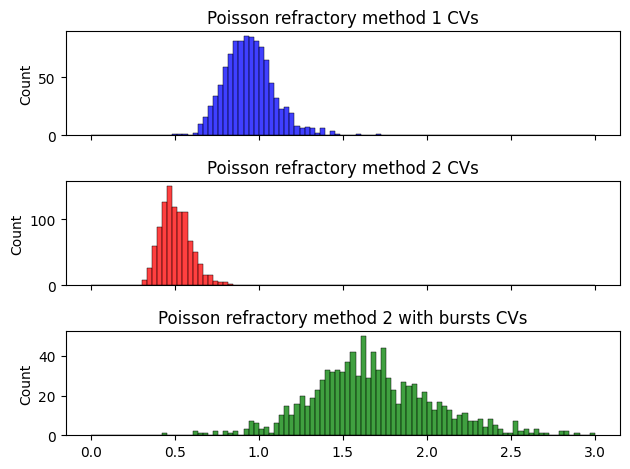

In [162]:
fig, axes = plt.subplots(3,1, sharex=True)
sns.histplot(CV_meth1, bins=bins, color='blue',ax=axes[0])
axes[0].set_title("Poisson refractory method 1 CVs");
sns.histplot(CV_meth2, bins=bins, color='red', ax=axes[1])
axes[1].set_title("Poisson refractory method 2 CVs");
sns.histplot(CV_meth2_bursts, bins=bins, color='green', ax=axes[2])
axes[2].set_title("Poisson refractory method 2 with bursts CVs");
plt.tight_layout()

The CVs for method 1 are centered around 1 which is what we would expect for a Poisson / memoryless distribution. Method 2 has a refractory period which makes the spike timings much more regular, pushing the CV lower because the standard deviation of ISIs is lower. Method 2 with bursts increases the standard deviation because sometimes there will be bursts and sometimes there won't be for long stretches, increasing the standard deviation and therefore the CV.

In [163]:
FanoFactor_meth1 = [fano_factor(trial, 0, T, 0.05) for trial in meth1]
FanoFactor_meth2 = [fano_factor(trial, 0, T, 0.05) for trial in meth2]
FanoFactor_meth2_bursts = [fano_factor(trial, 0, T, 0.05) for trial in meth2_burst]

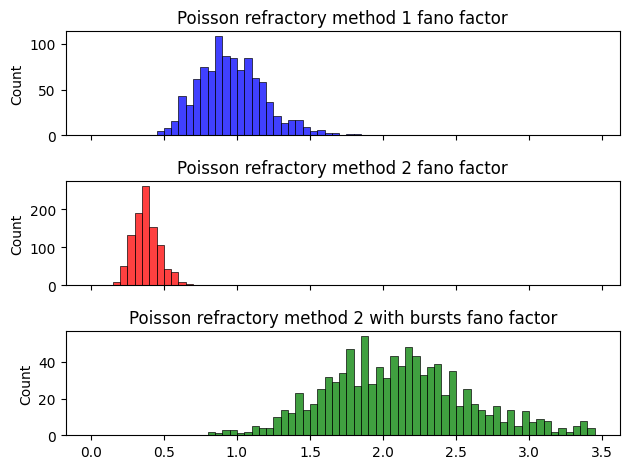

In [164]:
bins = np.arange(0,3.5,0.05)
fig, axes = plt.subplots(3,1, sharex=True)
sns.histplot(FanoFactor_meth1, bins=bins, color='blue',ax=axes[0])
axes[0].set_title("Poisson refractory method 1 fano factor");
sns.histplot(FanoFactor_meth2, bins=bins, color='red', ax=axes[1])
axes[1].set_title("Poisson refractory method 2 fano factor");
sns.histplot(FanoFactor_meth2_bursts, bins=bins, color='green', ax=axes[2])
axes[2].set_title("Poisson refractory method 2 with bursts fano factor");
plt.tight_layout()

Method 1 is centered on 1 and this makes sense because the fano factor is defined as $F(t) = \frac{\sigma_t^2}{\mu_t}$ and for a Poisson distribution $\sigma = \sqrt{\lambda}$ and $\mu = \lambda$. Method 2 has a much lower fano factor because of the refractory period shrinking the standard deviation. Method 2 with bursts has a large and spread out fano factor distribution because the burst spike trains increase the standard deviation.

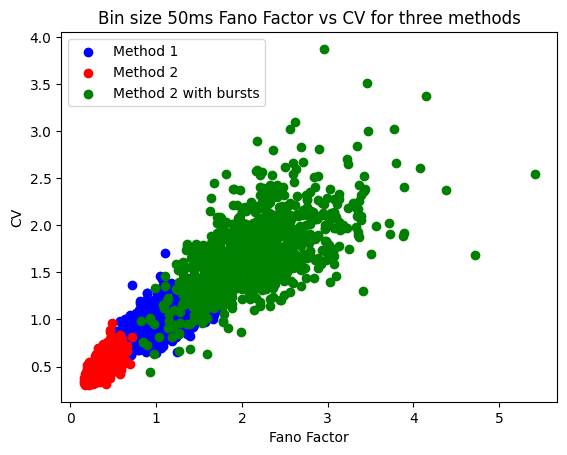

In [165]:
# scatter plot of fano factor vs CV
plt.scatter(FanoFactor_meth1, CV_meth1, color='blue', label='Method 1');
plt.scatter(FanoFactor_meth2, CV_meth2, color='red', label='Method 2');
plt.scatter(FanoFactor_meth2_bursts,CV_meth2_bursts, color='green', label='Method 2 with bursts');
plt.title("Bin size 50ms Fano Factor vs CV for three methods");
plt.xlabel('Fano Factor')
plt.ylabel('CV')
plt.legend();
plt.show()


At 50ms bin sizes, the relationship between Fano Factor and CV appears positive and generally linear because they both are measuring variability.

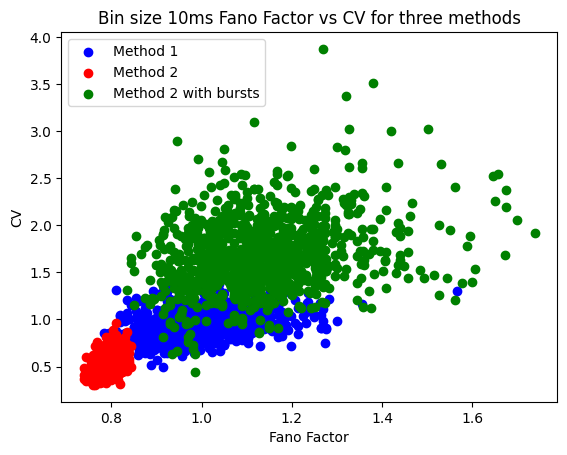

In [166]:
# bin size 10ms
FanoFactor_meth1_t = [fano_factor(trial, 0, T, 0.01) for trial in meth1]
FanoFactor_meth2_t = [fano_factor(trial, 0, T, 0.01) for trial in meth2]
FanoFactor_meth2_bursts_t = [fano_factor(trial, 0, T, 0.01) for trial in meth2_burst]

# scatter plot of fano factor vs CV
plt.scatter(FanoFactor_meth1_t, CV_meth1, color='blue', label='Method 1');
plt.scatter(FanoFactor_meth2_t, CV_meth2, color='red', label='Method 2');
plt.scatter(FanoFactor_meth2_bursts_t,CV_meth2_bursts, color='green', label='Method 2 with bursts');
plt.title("Bin size 10ms Fano Factor vs CV for three methods");
plt.xlabel('Fano Factor')
plt.ylabel('CV')
plt.legend();
plt.show()

At 10ms, an increasing Fano Factor doesn't seem to really affect CV values. This could come from the bins are now getting small enough that they don't contain very many spikes, putting a cap on the Fano Factor (we see this because now the x axis ends at 1.6 instead of 5 for 50ms bins).

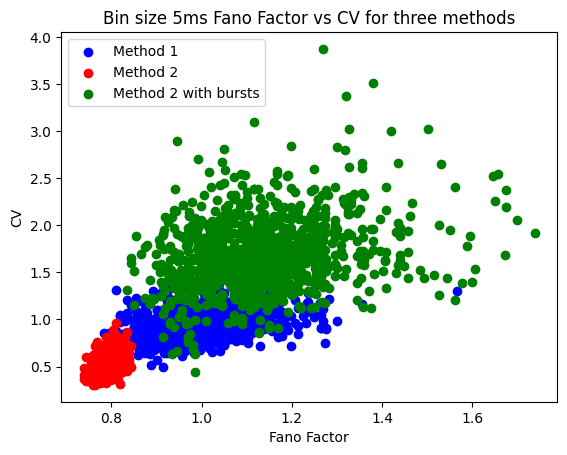

In [167]:
# bin size 5ms
FanoFactor_meth1_f = [fano_factor(trial, 0, T, 0.005) for trial in meth1]
FanoFactor_meth2_f = [fano_factor(trial, 0, T, 0.005) for trial in meth2]
FanoFactor_meth2_bursts_f = [fano_factor(trial, 0, T, 0.005) for trial in meth2_burst]

# scatter plot of fano factor vs CV
plt.scatter(FanoFactor_meth1_t, CV_meth1, color='blue', label='Method 1');
plt.scatter(FanoFactor_meth2_t, CV_meth2, color='red', label='Method 2');
plt.scatter(FanoFactor_meth2_bursts_t,CV_meth2_bursts, color='green', label='Method 2 with bursts');
plt.title("Bin size 5ms Fano Factor vs CV for three methods");
plt.xlabel('Fano Factor')
plt.ylabel('CV')
plt.legend();
plt.show()

We see a continuation of the 50ms -> 10ms process for 5ms with an increasing Fano Factor mostly leaving the CV the same, which I would expect for similar reasons as in the 10ms bin case. In the limit, with a super small bin size, the Fano Factor would approach one because it would just be a Poisson process of whether there was a spike in that bin or not.

# 3. Autocorrelogram plots
To visualize the frequency of spike time differences (lags).

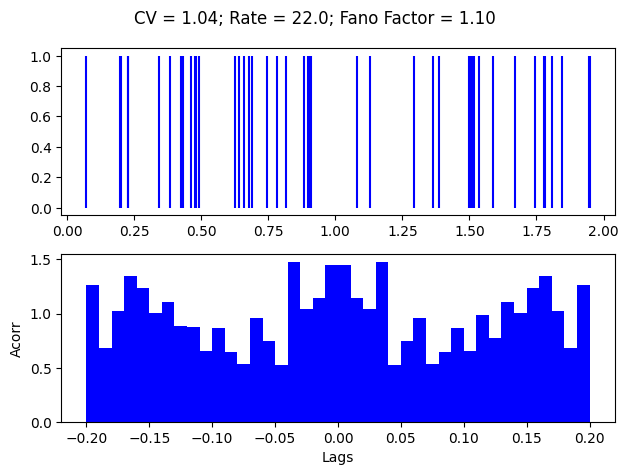

In [168]:
first_meth1 = meth1[0]
lags, acorr = autocorrelogram(first_meth1, T, max_lag=0.2, bin_size=0.01)
fig, axes = plt.subplots(2,1, tight_layout=True)

def rate(x):
    return len(x) / T

plt.suptitle(f"CV = {cv(first_meth1):.02f}; Rate = {rate(first_meth1)}; Fano Factor = {fano_factor(first_meth1, 0, T, 0.05):.2f}");
axes[0].vlines(first_meth1, ymin=0, ymax=1, linewidth=1.5, color='blue')
axes[1].set_xlabel("Lags")
axes[1].set_ylabel("Acorr")
axes[1].bar(lags, acorr, width=0.01, color='blue')
plt.show();

We see a seemingly uniform random distribution of spikes and also lags, showing no refractory period (because there isn't a gap in the middle).

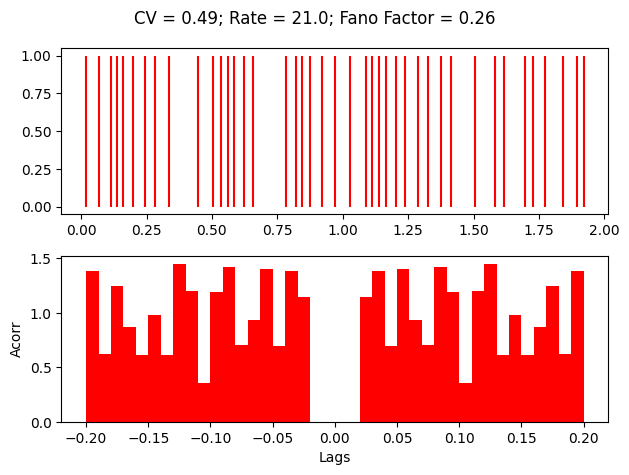

In [169]:
first_meth2 = meth2[0]
lags, acorr = autocorrelogram(first_meth2, T, max_lag=0.2, bin_size=0.01)
fig, axes = plt.subplots(2,1, tight_layout=True)
rate = lambda x: len(x) / T
plt.suptitle(f"CV = {cv(first_meth2):.02f}; Rate = {rate(first_meth2)}; Fano Factor = {fano_factor(first_meth2, 0, T, 0.05):.2f}");
axes[0].vlines(first_meth2, ymin=0, ymax=1, linewidth=1.5, color='red')
axes[1].set_xlabel("Lags")
axes[1].set_ylabel("Acorr")
axes[1].bar(lags, acorr, width=0.01, color='red')
plt.show();

The autocorrelogram visually shows us the existance of the refractory period because there are no spikes within a certain amount of time (refractory period) of any other spikes. Besides this it appears uniformly random.

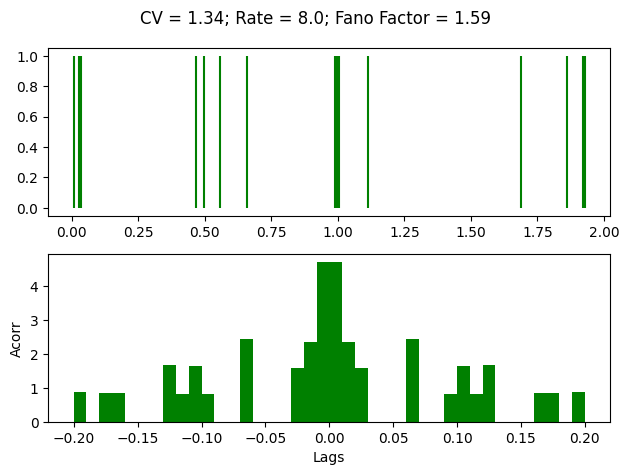

In [170]:
first_meth2b = meth2_burst[0]
lags, acorr = autocorrelogram(first_meth2b, T, max_lag=0.2, bin_size=0.01)
fig, axes = plt.subplots(2,1, tight_layout=True)
rate = lambda x: len(x) / T
plt.suptitle(f"CV = {cv(first_meth2b):.02f}; Rate = {rate(first_meth2b)}; Fano Factor = {fano_factor(first_meth2b, 0, T, 0.05):.2f}");
axes[0].vlines(first_meth2b, ymin=0, ymax=1, linewidth=1.5, color='green')
axes[1].set_xlabel("Lags")
axes[1].set_ylabel("Acorr")
axes[1].bar(lags, acorr, width=0.01, color='green')
plt.show();

The autocorrelogram shows us that most lags are very short and we can extrapolate from that and the spike train graph that we are dealing with a bursting neuron.

# 4. Peristimulus Time Histogram (PSTH)
To visualize how a neuron responded to an event.

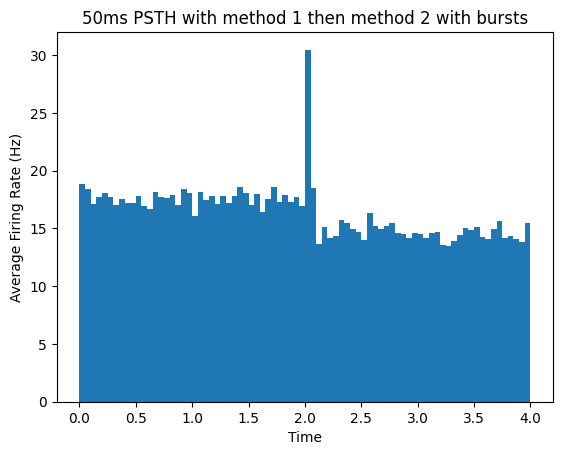

In [171]:
# neuron history
h = [
    np.concatenate((meth1[i], meth2_burst[i] + T), axis=0)
    for i in range(len(meth1))
]
bin_size = 0.05

bin_centers, counts = psth(h, bin_size, 0, 2*T)
plt.bar(bin_centers, counts, width=bin_size)
plt.xlabel('Time')
plt.ylabel('Average Firing Rate (Hz)')
plt.title("50ms PSTH with method 1 then method 2 with bursts")
plt.show()


We can't be in the refractory period directly after the start of method 2 with bursts so we see a huge amount of average spiking. Later, some neurons are in their refractory period while others are spiking but this is not the case right at the start. This plot shows us some of the variability in average firing rate that we see a lot of at 10ms but also clearly portrays the lower average firing rate in the second half. This plot is an appropriate balance between the 10ms and 100ms plots where we get some granular information without blurring the bigger picture too much.

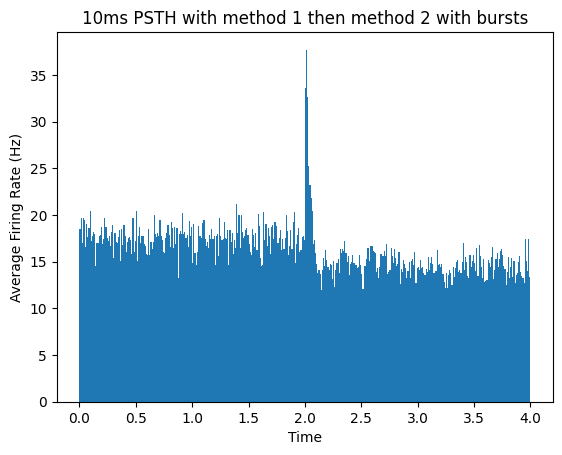

In [172]:
# neuron history
h = [
    np.concatenate((meth1[i], meth2_burst[i] + T), axis=0)
    for i in range(len(meth1))
]
bin_size = 0.01

bin_centers, counts = psth(h, bin_size, 0, 2*T)
plt.bar(bin_centers, counts, width=bin_size)
plt.xlabel('Time')
plt.ylabel('Average Firing Rate (Hz)')
plt.title("10ms PSTH with method 1 then method 2 with bursts")
plt.show()

This is a busy plot that conveys a lot of information. We can see the high spike right after t = 2.0s like the other plots but in addition we also get much more detail into the variability of the average firing rate. We can still see the decrease in firing rate after the spike at t = 2.0s but it is a little less visibile because of the noise.

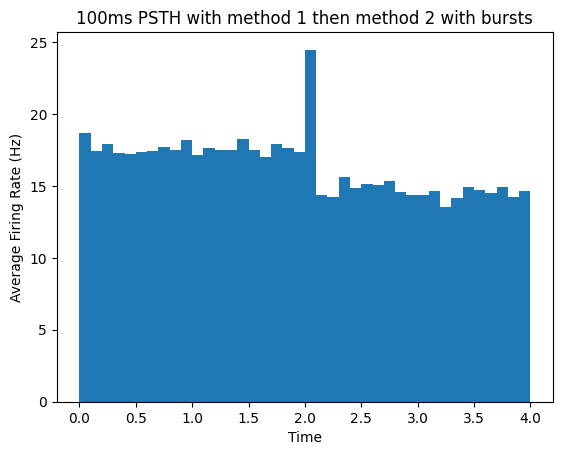

In [173]:
# neuron history
h = [
    np.concatenate((meth1[i], meth2_burst[i] + T), axis=0)
    for i in range(len(meth1))
]
bin_size = 0.1

bin_centers, counts = psth(h, bin_size, 0, 2*T)
plt.bar(bin_centers, counts, width=bin_size)
plt.xlabel('Time')
plt.ylabel('Average Firing Rate (Hz)')
plt.title("100ms PSTH with method 1 then method 2 with bursts")
plt.show()

This plot clearly shows the spike after t = 2.0s and the lower average firing rate in the second part of the plot. We lose the granularity of variation in average firing rate that we have with 10ms bins but in return we gain clarity into the broader picture of "big spike then lower rate".

# 5. How does fano factor change based on the bin size?
Using a much longer simulation

In [174]:
T = 10

# generate spike trains!
meth1 = poisson_refractory_method1(np.random.randint(15,21), T, tau_ref=0)
meth2 = poisson_refractory_method2(np.random.randint(20,23), T, tau_ref=np.random.randint(20,26) / 1000)
meth2_burst = poisson_burst_method2(np.random.randint(4,9), np.random.randint(80,91), T, tau_ref=np.random.randint(2,5)/1000, tau_burst=np.random.randint(40,61)/1000, prob_burst=np.random.uniform(0.4,0.6), prob_end=np.random.uniform(0.2,0.3))

In [175]:
# calculate fano factor for different values of bin sizes
bin_size = np.arange(0.002, 1.002, 0.002)
meth1_ffs = [fano_factor(meth1, 0, T, b) for b in bin_size]
meth2_ffs = [fano_factor(meth2, 0, T, b) for b in bin_size]
meth2_burst_ffs = [fano_factor(meth2_burst, 0, T, b) for b in bin_size]

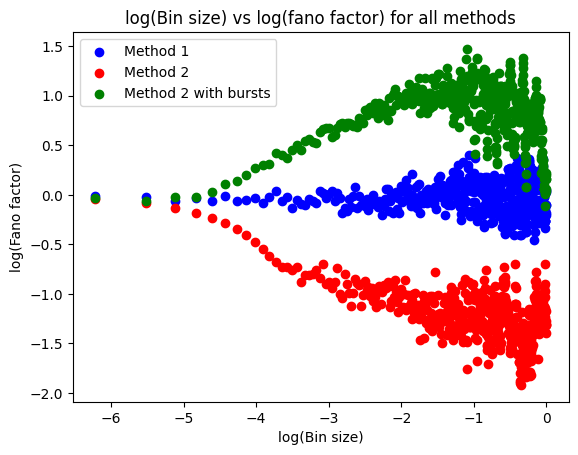

In [176]:
logbin_size = np.log(bin_size)
logmeth1_ffs = np.log(meth1_ffs)
logmeth2_ffs = np.log(meth2_ffs)
logmeth2_burst_ffs = np.log(meth2_burst_ffs)
plt.scatter(logbin_size, logmeth1_ffs, color='blue', label='Method 1')
plt.scatter(logbin_size, logmeth2_ffs, color='red', label='Method 2')
plt.scatter(logbin_size, logmeth2_burst_ffs, color='green', label='Method 2 with bursts')
plt.title('log(Bin size) vs log(fano factor) for all methods')
plt.xlabel('log(Bin size)')
plt.ylabel('log(Fano factor)')
plt.legend()
plt.show()

We see an overlapping Fano Factor of 1 for very small bin sizes, then what appears to be three different linear slopes separating the three methods. At much larger bin sizes (0.1s to 1s), we see the Fano Factors becoming noisy and the different methods overlapping. Ideally we would like to use a bin size of 0.001 or 0.01 (when log(Bin size) = -3 or -2) because that would let us distinguish best between the three different methods. For the three spike trains, we would expect Method 2 with bursts to have the highest Fano Factor because it would have the largest standard deviation in the count of spikes by nature of bursting. Then Method 1 would have a Fano Factor around 1 because it is just a Poisson process. Method 2 without burst but with a refractory period would have the lowest Fano Factor because the refractory period would act to decrease the standard deviation of the counts in each bin because the spacing between spikes becomes more regular so the difference of each bin's count to the mean bin count would decrease.